In [1]:
# try frobenius method??


# test residuals to see if (x, t) solution satisfies original differential equations


%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from numpy import sin, cos, tan, atan, cosh, sinh, tanh, abs, linspace, min, max, argmin, argmax, pi, mean, exp, sqrt, zeros, ones, nan
import scipy
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.polynomial import chebyshev

sys.path.insert(0,'../../src/harmonic/')
sys.path.insert(0,'../../src/timesteps/')

from cswe_harm import *


425.97824266835624
3.9436645948996246e-08
6.950006742353542e-13
595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14
1638.7583150329738
5.920252386424856e-07
2.891952503627288e-09
2.182069755886869e-13
2715.9995004055077
1.5076550014413259e-06
3.7131783655399014e-10
2.4389842050195334e-13


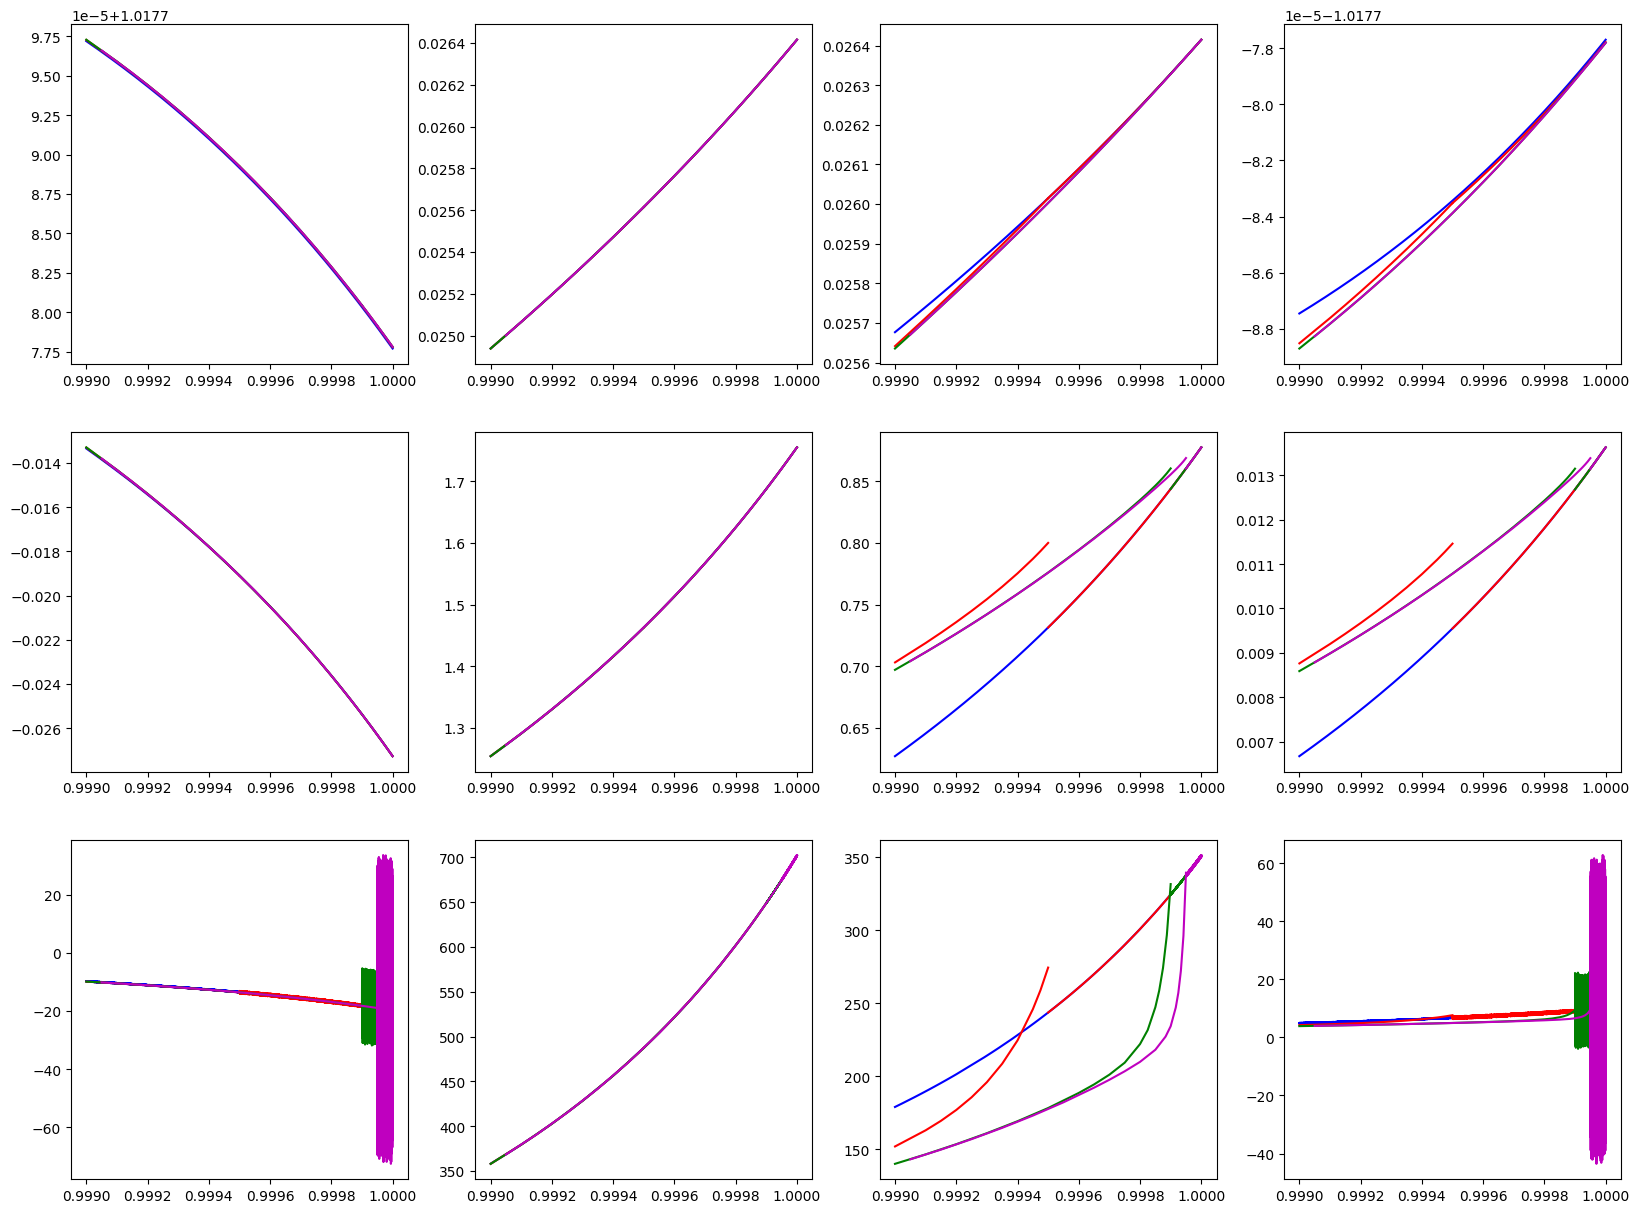

In [2]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
bnds = [0.99, 0.995, 0.999, 0.9995, 0.9999]
bnds = [0.999, 0.9995, 0.9999, 0.99995]
for bnd_i in range(len(bnds)):
    csweharm.boundary = bnds[bnd_i]
    csweharm.solve_LO_split_domain()

    
    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - bnds[0]) * 4)))
    
    st =  np.argmin(abs(csweharm.yl0.x - 0.999))
    for i in range(4):
        axs[0, i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], cols[bnd_i])
        axs[0, i].plot(csweharm.yr0.x, csweharm.yr0.y[i], cols[bnd_i])

    for i in range(4):
        axs[1, i].plot(csweharm.yl0.x[st:], csweharm.yl0.sol(csweharm.yl0.x[st:], nu=1)[i], cols[bnd_i])
        axs[1, i].plot(csweharm.yr0.x     , csweharm.yr0.sol(csweharm.yr0.x, nu=1)[i], cols[bnd_i])


    for i in range(4):
        axs[2, i].plot(csweharm.yl0.x[st:], csweharm.yl0.sol(csweharm.yl0.x[st:], nu=2)[i], cols[bnd_i])
        axs[2, i].plot(csweharm.yr0.x     , csweharm.yr0.sol(csweharm.yr0.x, nu=2)[i], cols[bnd_i])
plt.show()

235.73751423513016
1.7101452723133627e-05
4.3371639467591745e-15
262.01813836720487
2.7365746407718274e-07
1.7145359549935767e-14
425.97824266835624
3.9436645948996246e-08
6.950006742353542e-13
595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14
1638.7583150329738
5.920252386424856e-07
2.891952503627288e-09
2.182069755886869e-13


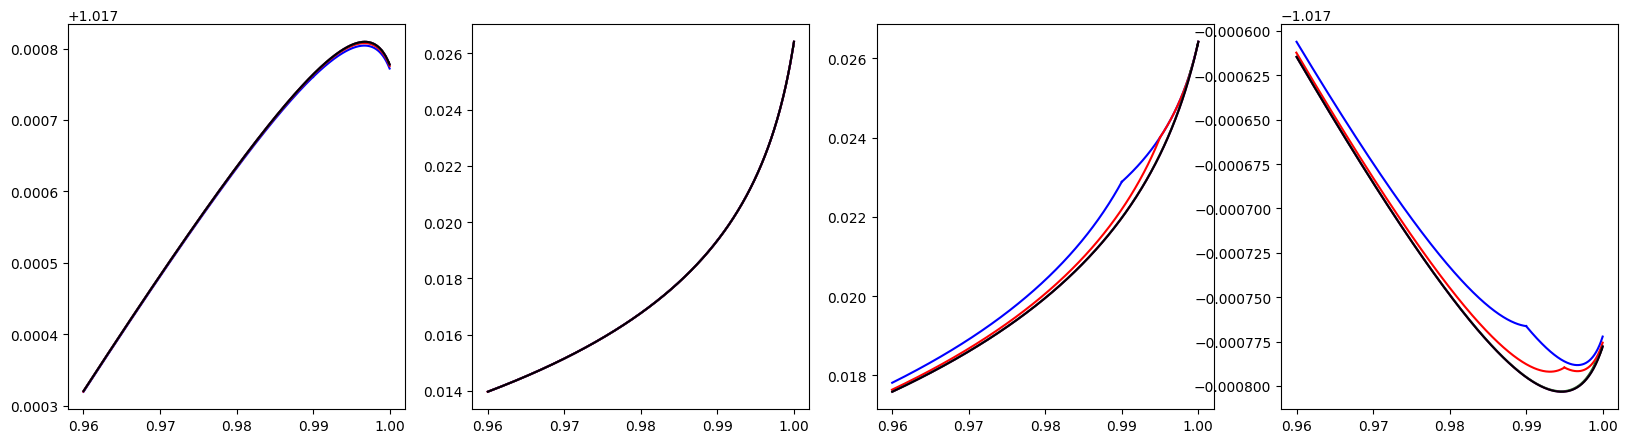

In [3]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
bnds = [0.99, 0.995, 0.999, 0.9995, 0.9999]
for bnd_i in range(len(bnds)):
    csweharm.boundary = bnds[bnd_i]
    csweharm.solve_LO_split_domain()

    
    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], cols[bnd_i])
        axs[i].plot(csweharm.yr0.x, csweharm.yr0.y[i], cols[bnd_i])
plt.show()


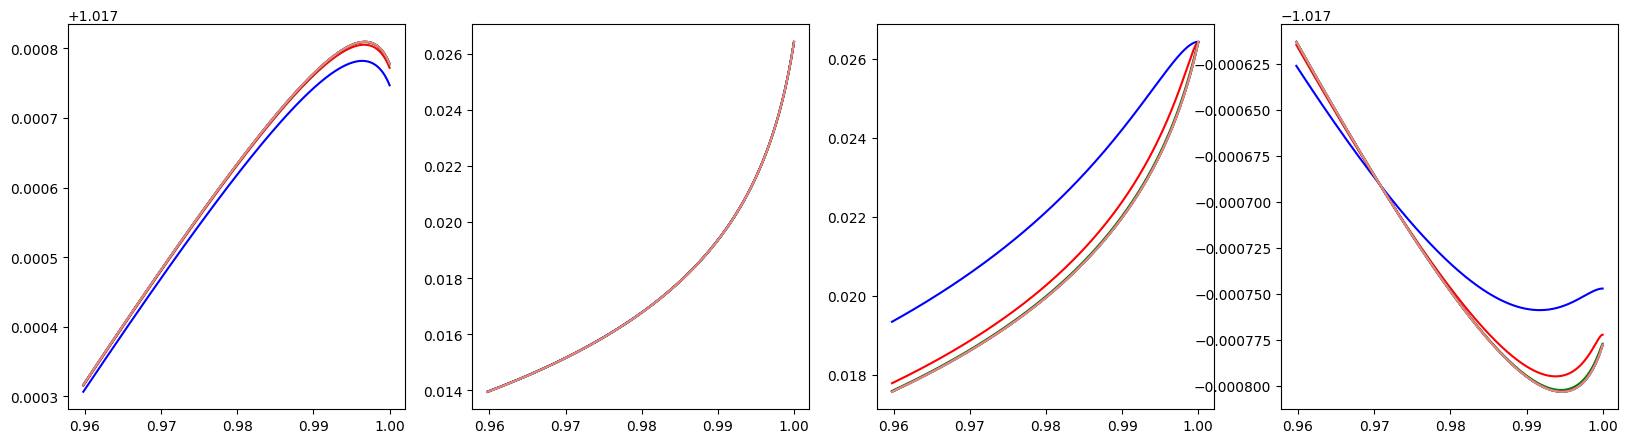

In [4]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c', 'salmon', 'y']
sns = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-9, 1e-11]
for k in range(len(sns)):
    csweharm.small_number = sns[k]
    csweharm.solve_LO_small_number()

    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.y0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.y0.x[st:], csweharm.y0.y[i, st:], cols[k])
plt.show()




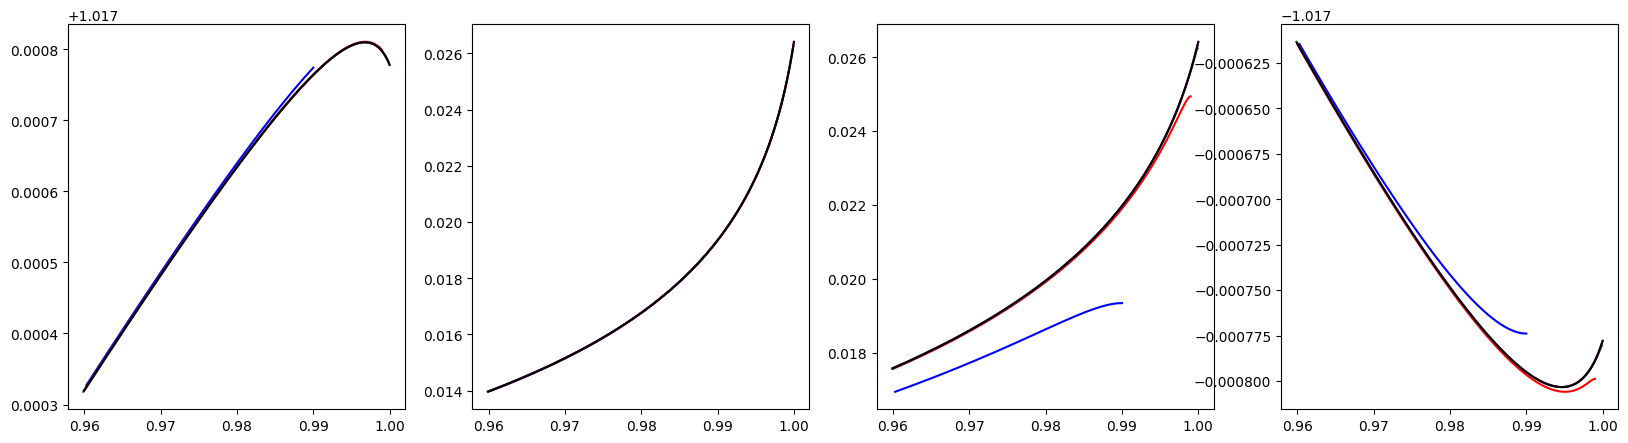

In [5]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-9, 1e-11]
for k in range(len(bnds)):
    csweharm.domain_reduction = sns[k]
    csweharm.solve_LO_reduced_domain()

    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.y0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.y0.x[st:], csweharm.y0.y[i, st:], cols[k])
plt.show()



595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14


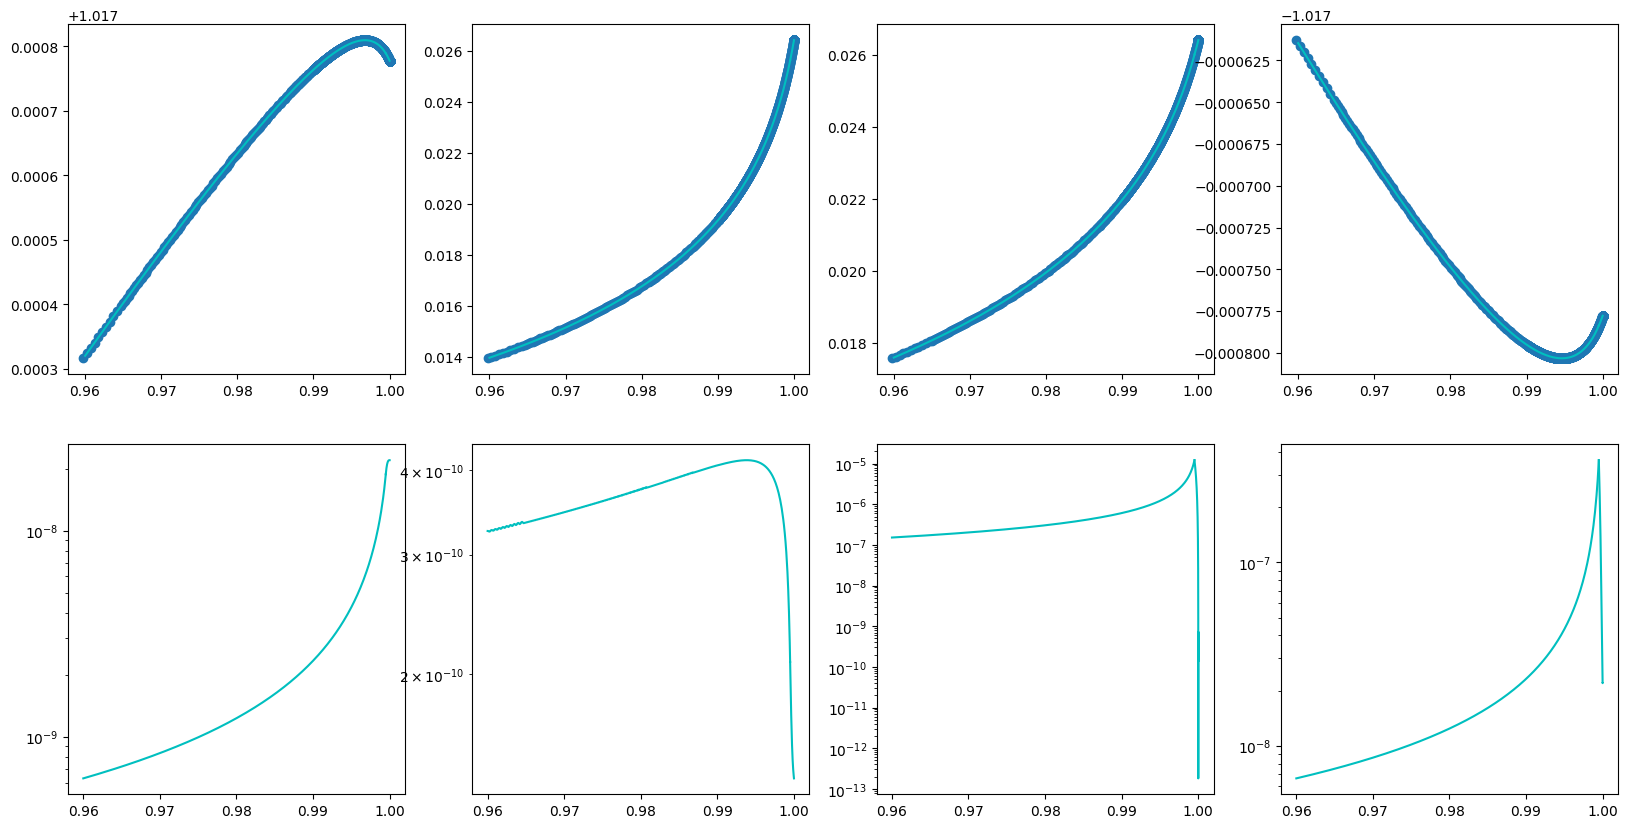

595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14


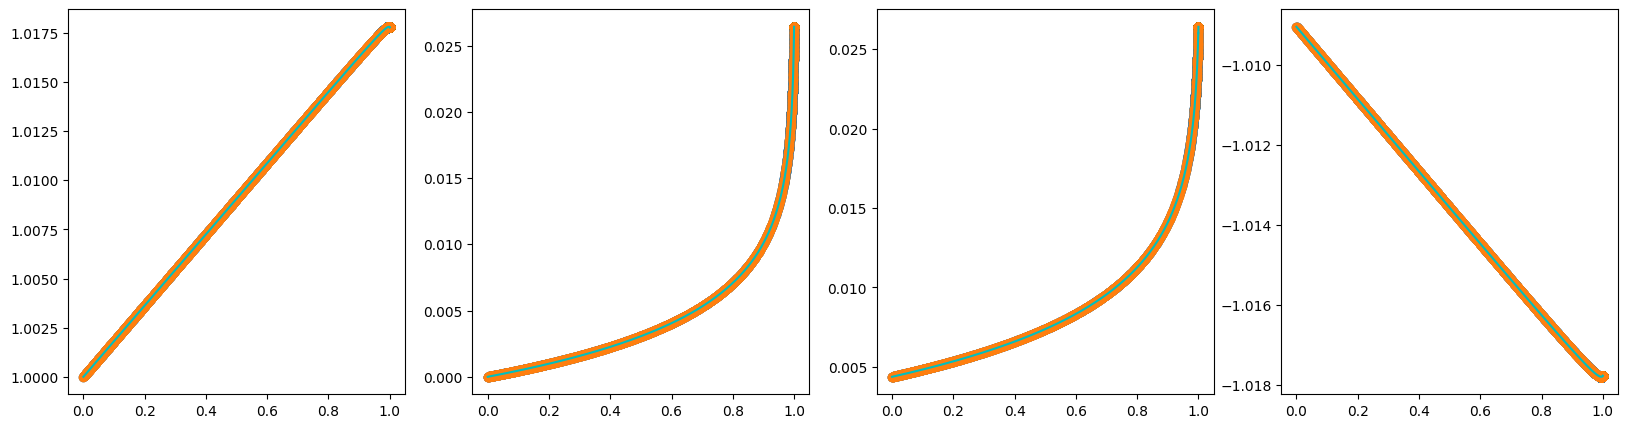

In [6]:
r = 0.24

# ref solution
csweref = CSWEHarm()
csweref.r = r
csweref.small_number = 1e-9
csweref.solve_LO_small_number()
ref_sol = csweref.y0


csweharm = CSWEHarm()
# csweharm.debug= False

# factor = 1
# csweharm.A *= factor
# csweharm.epsilon *= factor

csweharm.r = r



fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plot_bnd = 0.96


csweharm.boundary = 0.9995
csweharm.solve_LO_split_domain()
st = np.argmin(abs(csweharm.yl0.x - plot_bnd))
for i in range(4):
    axs[0, i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], 'c')
    axs[0, i].plot(csweharm.yr0.x, csweharm.yr0.y[i], 'c')

    axs[1, i].semilogy(csweharm.yl0.x[st:], abs(ref_sol.sol(csweharm.yl0.x[st:])[i] - csweharm.yl0.y[i, st:]), 'c')
    axs[1, i].semilogy(csweharm.yr0.x, abs(ref_sol.sol(csweharm.yr0.x)[i] - csweharm.yr0.y[i]), 'c')


csweharm.small_number = 1e-9
csweharm.solve_LO_small_number()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[0, i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:])
    # axs[1, i].semilogy(csweharm.y0.x[st:], abs(ref_sol.sol(csweharm.y0.x[st:])[i] - csweharm.y0.y[i, st:]))
    

plt.show()

csweharm.domain_reduction = 1e-9
csweharm.solve_LO_reduced_domain()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[0, i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:], hatch='x')#, c='k')
    axs[1, i].semilogy(csweharm.y0.x[st:], abs(ref_sol.sol(csweharm.y0.x[st:])[i] - csweharm.y0.y[i, st:]))


plt.show()








fig, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_bnd = 0

csweharm.boundary = 0.9995
csweharm.solve_LO_split_domain()
st = np.argmin(abs(csweharm.yl0.x - plot_bnd))
for i in range(4):
    axs[i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], 'c')
    axs[i].plot(csweharm.yr0.x, csweharm.yr0.y[i], 'c')


csweharm.small_number = 1e-9
csweharm.solve_LO_small_number()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:])


csweharm.domain_reduction = 1e-9
csweharm.solve_LO_reduced_domain()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:])#, c='k')


plt.show()
